## 2.7.2 插值核的频谱

参考了Matlab代码 https://www.freesion.com/article/3572806182/


In [7]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['FangSong'] # 指定默认字体 
plt.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题 

sinc插值核

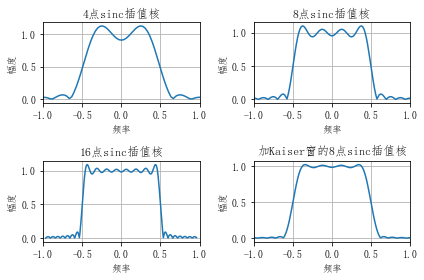

In [8]:
#% figure设置
fig = plt.figure(); #set( h, 'position', [100,100,900,600]);

#% N为插值核的点数，flag表示是否加窗
Nall = [ 4, 8, 16,  8 ];
flag = [ 0, 0,  0,  1 ];

#% 设置抽样点数sn 和 fft点数sf(sf>sn是为了频域插值 使得频域曲线光滑)
sn = 2**5;
sf = 2**8;

#% 设置kaiser窗的beta
beta = 2.5;

#% 频谱
sub_count = 0;
for N in Nall:
    
    #% 设置title
    title_now =str(N)+'点sinc插值核'
    
    #% 得到插值核
    t = np.linspace( -N/2, N/2, sn );
    s = np.sinc(t);
    
    #% 是否加窗
    if flag[ sub_count] == 1:
        #% 加窗
        s = s * np.transpose(np.kaiser( sn, beta ));
        #更新title_now
        title_now = '加Kaiser窗的'+title_now
    
    #% 得到fs
    dt = ( t[-1] - t[0] )/( len(t) - 1 );
    fs = 1/dt;
    
    #% 得到频谱; *dt转化为FT的结果
    af = np.fft.fftshift( np.fft.fft( s, sf) ) * dt;
    
    #% 得到频点
    fre = np.arange(0,sf,1)*fs/sf - fs/2;
    
    #% 画图
    sub_count = sub_count + 1; 
    plt.subplot( 2, 2, sub_count ); 
    plt.plot(  fre, abs(af) );
    plt.xlim([-1,1]); 
    plt.grid( )
    plt.title( title_now );
    plt.xlabel('频率')
    plt.ylabel('幅度')
    plt.tight_layout()
